# Sentiment Analysis on IMDB movie review dataset


The IMDB Movie Review dataset represents an expansive collection designed for binary sentiment classification, distinguishing itself by offering a significantly larger dataset than previous benchmarks. Comprising 50,000 movie reviews, evenly split between training and testing sets, it serves as a valuable resource for various applications. The dataset not only includes labeled data for sentiment analysis but also incorporates an additional segment of unlabeled data for versatile exploration. 


For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/


### Introduction:

In this project we try to study the sentiment analysis on these reviews and categories as possitive and negetive and try to build model using Naive bayes

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv(r'F:\Imarticus\IMDB Dataset.csv')

In [3]:
#EDA
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape


(50000, 2)

In [5]:
df.describe()


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df.isnull().sum()


review       0
sentiment    0
dtype: int64

In [7]:
df['sentiment'].unique()


array(['positive', 'negative'], dtype=object)

<Axes: xlabel='sentiment', ylabel='count'>

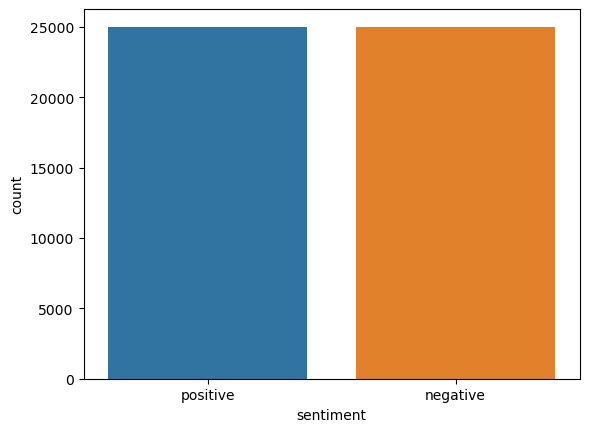

In [8]:
import seaborn as sns
sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index)


there is no class imbalance

In [9]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Regular expression to remove HTML tags
html = re.compile(r'<.*?>')
df['review'] = df['review'].str.replace(html, '', regex=True)


df['review'] = df['review'].str.lower()

sw = stopwords.words('english')
df['review'] = df['review'].apply(lambda x:[word for word in x.split() if word not in sw]).apply(lambda x:" ".join(x))

#Converting target feature to numeric values
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])


In [10]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production. filming technique...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there's family little boy (jake) thi...,0
4,"petter mattei's ""love time money"" visually stu...",1


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(df['review']).toarray()

In [12]:
#split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, df.sentiment, test_size=0.2 )


In [13]:
X.shape

(50000, 5000)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Multinomial Naive Bayes model

nb_model = MultinomialNB()

nb_model.fit(X_train, Y_train)

MultinomialNB()

In [15]:
predictions = nb_model.predict(X_test)


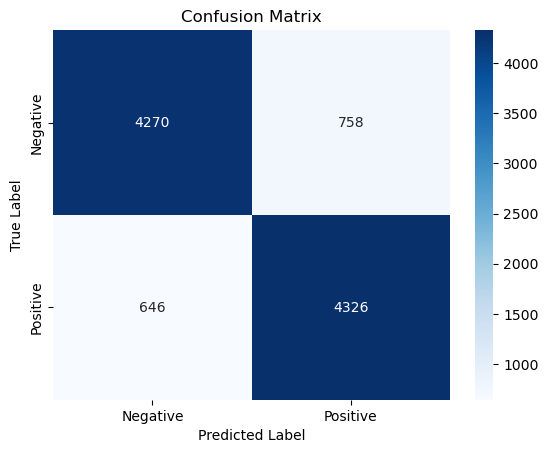

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8596


In [18]:
import pickle

# Assuming 'model' is your trained LSTM model

# Save the model to a file
model_filename = 'imdbmnb1.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(nb_model, model_file)